In [1]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import scipy.integrate as integrate
import matplotlib.colors as mcolors
import matplotlib.cm
import glob
from scipy import interpolate

In [2]:
p_avg     = 3.e3 * 1.e5
G         = 6.67e-8
Sigma_diss = 1.5 * Msun /pc/pc/Myr
chi0 = 1.0
#xi = chi0 * Sigma_diss *t0/Sigma_gas

# Daddi+10

In [3]:
data_home = os.path.join(home, "Data/CleanData/")
datapath = os.path.join(data_home, "*.txt")
list_file = glob.glob(datapath)
log_siggas = []
log_sigSFR = []
log_siggas_tdyn = []
galtype = []
radius = []
torb = []
list_file = ['/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/daddi10.txt']
for file in list_file:
    infile = open(file)
    lines = infile.readlines()
#     print(file)
    for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            siggas = float(line.split()[0])
            sigSFR = float(line.split()[1])
            sgastdyn = float(line.split()[2])
            gal_type = str(line.split()[3])
            rad = float(line.split()[4])
            torbval = float(line.split()[5])
            if(file == '/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/daddi10.txt'):
                siggas = np.log10(siggas)
                sigSFR = np.log10(sigSFR)
                sgastdyn = np.log10(sgastdyn)
            torb.append(torbval)
            log_siggas.append(siggas)
            log_sigSFR.append(sigSFR)
            log_siggas_tdyn.append(sgastdyn)
            galtype.append(gal_type)
            radius.append(rad)

            break
            
log_siggas_daddi       = log_siggas
log_sigSFR_daddi       = log_sigSFR
log_siggas_tdyn_daddi  = log_siggas_tdyn
galtype_daddi          = galtype

siggas_daddi     = 10.**(np.asarray(log_siggas_daddi))*Msun/pc/pc
sigSFR_daddi     = 10.**(np.asarray(log_sigSFR_daddi))*Msun/yr_to_sec/kpc/kpc
siggas_tdyn_daddi= 10.**(np.asarray(log_siggas_tdyn_daddi))*Msun/yr_to_sec/pc/pc/1.e6
torb_daddi       = np.asarray(torb) * Myr
rad_daddi        = np.asarray(radius)*kpc
v0_daddi         =  2. *math.pi * rad_daddi/torb_daddi/kmps
gamma_data_daddi = sigSFR_daddi * p_avg * torb_daddi**2/(16. * math.pi**2 * rad_daddi * siggas_daddi)
xi_data_daddi = chi0 * Sigma_diss * torb_daddi/(2.**1.5 * math.pi * siggas_daddi)
# xi_data_daddi = chi0 * Sigma_diss/(siggas_tdyn_daddi)
np.amax(gamma_data_daddi),np.amin(gamma_data_daddi),np.amax(xi_data_daddi),np.amin(xi_data_daddi)

(1.1609326759320253,
 0.058313746708636836,
 0.15776570960696956,
 0.017064852111817547)

In [5]:
np.amin(log_sigSFR_daddi)

-0.0399099320950805

In [5]:
daddi_name = [
    'BzK-4171',
'BzK-21000', 
'BzK-16000',
'BzK-17999',
'BzK-12591',
'BzK-25536' 
]

In [6]:
i=0
for galtype, sfr, siggas, torb, rad, gam, xi in zip(galtype_daddi, np.asarray(log_sigSFR_daddi), np.asarray(log_siggas_daddi), np.asarray(torb_daddi)/Myr, (rad_daddi/kpc), np.log10(np.asarray(gamma_data_daddi)), np.log10(np.asarray(xi_data_daddi))):
    if(galtype!='Starburst'):
        tyype = 'Non-SB'
    else:
        tyype = 'SB'
    print(daddi_name[i] +  ' & ' + tyype + ' & ' '%.2f'%(sfr) +' & ' '%.2f'%(siggas) +' & ' '%.1f'%(torb) +' & ' '%.1f'%(rad) +' & ' '%.2f'%(gam) +' & ' '%.2f'%(xi) + ' \\' + '\\')
    i+=1

BzK-4171 & Non-SB & 0.08 & 2.95 & 90.0 & 3.7 & -1.23 & -1.77 \\
BzK-21000 & Non-SB & 0.19 & 2.96 & 170.0 & 6.2 & -0.80 & -1.50 \\
BzK-16000 & Non-SB & -0.03 & 2.56 & 340.0 & 5.1 & 0.06 & -0.80 \\
BzK-17999 & Non-SB & 0.03 & 2.66 & 130.0 & 4.7 & -0.78 & -1.31 \\
BzK-12591 & Non-SB & -0.04 & 2.53 & 90.0 & 4.5 & -1.01 & -1.35 \\
BzK-25536 & Non-SB & 0.05 & 2.88 & 210.0 & 3.0 & -0.37 & -1.33 \\


# Genzel+10 Data

In [6]:
data_home = os.path.join(home, "Data/CleanData/")
datapath = os.path.join(data_home, "*.txt")
list_file = glob.glob(datapath)
log_siggas = []
log_sigSFR = []
log_siggas_tdyn = []
galtype = []
radius = []
log_torb = []
v0_genzel = []
list_file = ['/Users/aditivijayan/Projects/PhotoDissociation/Data/CleanData/genzel2010.txt']
for file in list_file:
    infile = open(file)
    lines = infile.readlines()
#     print(file)
    for line in lines:
        while(line.split()[0]!='#' and line.split()[0]!='\n'):
            siggas = float(line.split()[0])
            sigSFR = float(line.split()[1])
            sgastdyn = float(line.split()[2])
            gal_type = str(line.split()[3])
            rad = float(line.split()[4])
            torb = float(line.split()[5])
            v0 = float(line.split()[6])
            log_torb.append(torb)
            log_siggas.append(siggas)
            log_sigSFR.append(sigSFR)
            log_siggas_tdyn.append(sgastdyn)
            galtype.append(gal_type)
            radius.append(rad)
            v0_genzel.append(v0)
            break
            
log_siggas_genzel =(log_siggas)
log_sigSFR_genzel = log_sigSFR
log_torb_genzel = (log_torb)
log_siggas_tdyn_genzel = log_siggas_tdyn

siggas_genzel = 10.**(np.asarray(log_siggas))*Msun/pc/pc
sigSFR_genzel = 10.**(np.asarray(log_sigSFR_genzel))*Msun/yr_to_sec/kpc/kpc
siggas_tdyn_genzel = 10.**(np.asarray(log_siggas_tdyn_genzel))*Msun/yr_to_sec/pc/pc/1.e6
torb_genzel = 10.**np.asarray(log_torb) * Myr
galtype_genzel = (galtype)
rad_genzel = np.asarray(radius)*kpc
torb_genzel1 = 2.* math.pi * rad_genzel/v0_genzel/kmps

gamma_data_genzel = sigSFR_genzel * p_avg * torb_genzel1**2/(16. * math.pi**2 * rad_genzel * siggas_genzel)
xi_data_genzel = chi0 * Sigma_diss * torb_genzel1/(2.**1.5 * math.pi * siggas_genzel)
# xi_data_genzel = chi0 * Sigma_diss/siggas_tdyn_genzel
np.amax(gamma_data_genzel),np.amin(gamma_data_genzel),np.amax(xi_data_genzel),np.amin(xi_data_genzel)

(0.30304662518819475,
 0.018529167563143205,
 0.07268553308526017,
 5.613360292468564e-05)

In [7]:
name_genzel = [

'Q2343-MD59 ',     
'SMMJ02399-0136'  ,
'SMMJ09431+4700  ',
'SMMJ105141+5719',  
'SMMJ123549+6215',  
'SMMJ123634+6212',  
'SMMJ123707+6214',  
'SMMJ131201+4242',  
'SMMJ131232+4239',  
'SMMJ163650+4057',  
'SMMJ163658+4105'  ]

In [8]:
i=0
for galtype, sfr, siggas, torb, rad, gam, xi in zip(galtype_genzel, np.asarray(log_sigSFR_genzel), np.asarray(log_siggas_genzel), np.asarray(torb_genzel1)/Myr, (rad_genzel/kpc),  np.log10(np.asarray(gamma_data_genzel)), np.log10(np.asarray(xi_data_genzel))):
    if(galtype!='Starburst'):
        tyype = 'Non-SB'
    else:
        tyype = 'SB'
    print( name_genzel[i] + ' & ' + tyype + ' & ' '%.2f'%(sfr) +' & ' '%.2f'%(siggas) +' & ' '%.1f'%(torb) +' & ' '%.1f'%(rad) +' & ' '%.2f'%(gam) +' & ' '%.2f'%(xi) + ' \\' + '\\')
    i+=1

Q2343-MD59  & Non-SB & -0.68 & 2.69 & 210.9 & 5.5 & -1.16 & -1.14 \\
SMMJ02399-0136 & SB & 0.84 & 2.73 & 52.0 & 5.1 & -0.87 & -1.79 \\
SMMJ09431+4700   & SB & 1.83 & 3.63 & 28.6 & 1.4 & -0.74 & -2.95 \\
SMMJ105141+5719 & SB & 1.04 & 2.76 & 40.8 & 3.1 & -0.69 & -1.92 \\
SMMJ123549+6215 & SB & 2.20 & 4.10 & 12.3 & 0.9 & -1.38 & -3.78 \\
SMMJ123634+6212 & SB & 0.63 & 2.68 & 72.0 & 4.1 & -0.65 & -1.60 \\
SMMJ123707+6214 & SB & 1.01 & 2.83 & 53.2 & 2.8 & -0.52 & -1.88 \\
SMMJ131201+4242 & SB & 1.09 & 3.09 & 42.0 & 3.0 & -0.93 & -2.24 \\
SMMJ131232+4239 & SB & 1.29 & 3.28 & 34.8 & 2.0 & -0.91 & -2.51 \\
SMMJ163650+4057 & SB & 1.37 & 3.52 & 27.6 & 2.4 & -1.35 & -2.85 \\
SMMJ163658+4105 & SB & 2.44 & 4.39 & 8.2 & 0.8 & -1.73 & -4.25 \\


# Kennicutt Data-- taken from Kennicutt98 and Krumholz+12, distances from simbad

In [9]:
file = '/Users/aditivijayan/Projects/PhotoDissociation/Data/krumholz_kennit_gal_data.txt'
name_kenni = np.loadtxt(file, usecols=0)
rad_kenni = np.loadtxt(file, usecols=3)*kpc
log_sigmagas_kenni = np.loadtxt(file, usecols=4)
log_sigmaSFR_kenni = np.loadtxt(file, usecols=5)
torb_kenni = np.loadtxt(file, usecols=-2)*Myr
log_siggas_tdyn_kenni = np.loadtxt(file, usecols=-1)


siggas_kenni = 10.**(np.asarray(log_sigmagas_kenni))*Msun/pc/pc
sigSFR_kenni = 10.**(np.asarray(log_sigmaSFR_kenni))*Msun/yr_to_sec/kpc/kpc
siggas_tdyn_kenni = 10.**(np.asarray(log_siggas_tdyn_kenni))*Msun/yr_to_sec/pc/pc/1.e6
v0_kenni = 2.*math.pi*rad_kenni/(torb_kenni)/kmps
gal_type_kenni = ['D']*log_sigmagas_kenni.shape[0]

gamma_data_kenni = sigSFR_kenni * p_avg * (torb_kenni)**2/(16. * math.pi**2 * rad_kenni * siggas_kenni)
gamma_data_kenni[gamma_data_kenni>1.e4]=1.e4
# xi_data_kenni    = chi0 * Sigma_diss/siggas_tdyn_kenni
xi_data_kenni = chi0 * Sigma_diss * torb_kenni/(2.**1.5 * math.pi * siggas_kenni)
np.amax(gamma_data_kenni),np.amin(gamma_data_kenni),np.amax(xi_data_kenni),np.amin(xi_data_kenni)

(3.0894612486273942,
 0.012151557453640733,
 23.84507752748416,
 0.8079756233093239)

# Formatting for Paper Table

In [11]:
rad_kenni/kpc

array([16.77,  6.48, 34.45, 12.26,  1.09, 33.02, 27.49, 13.96,  2.49,
       11.59,  9.14, 20.53,  9.42, 10.  , 15.27, 14.67, 15.4 , 10.96,
        9.61,  8.  , 13.2 , 15.33,  6.18, 14.97, 17.25,  9.9 ,  7.19,
       13.05,  7.64, 15.99, 12.94,  4.67, 20.05,  9.39, 12.94,  6.85,
        8.63, 12.72, 10.91,  9.9 ,  9.39,  9.05,  6.85, 11.88, 12.79,
       23.4 ,  6.03,  9.16,  4.26,  9.86, 17.25])

In [12]:
i=0
for galtype, sfr, siggas, torb, rad, gam, xi in zip(gal_type_kenni, np.asarray(log_sigmaSFR_kenni), np.asarray(log_sigmagas_kenni), np.asarray(torb_kenni)/Myr, (rad_kenni/kpc),  np.log10(np.asarray(gamma_data_kenni)), np.log10(np.asarray(xi_data_kenni))):
    if(galtype!='Starburst'):
        tyype = 'Non-SB'
    else:
        tyype = 'SB'
    print('NGC%d'%name_kenni[i] + ' & ' + tyype + ' & ' + '%.2f'%(sfr) +' & ' '%.2f'%(siggas) +' & ' '%.1f'%(torb) +' & ' '%.3f'%(rad) +' & ' '%.2f'%(gam) +' & ' '%.2f'%(xi) + ' \\' + '\\')
    i+=1

NGC224 & Non-SB & -3.37 & 0.68 & 457.1 & 16.770 & -1.66 & 1.21 \\
NGC598 & Non-SB & -2.71 & 1.03 & 398.1 & 6.480 & -1.05 & 0.80 \\
NGC772 & Non-SB & -3.08 & 0.94 & 794.3 & 34.450 & -1.46 & 1.19 \\
NGC925 & Non-SB & -2.68 & 0.91 & 724.4 & 12.260 & -0.66 & 1.18 \\
NGC1569 & Non-SB & -1.04 & 1.33 & 199.5 & 1.090 & 0.49 & 0.20 \\
NGC2336 & Non-SB & -2.16 & 0.91 & 741.3 & 33.020 & -0.55 & 1.19 \\
NGC2403 & Non-SB & -2.39 & 0.88 & 346.7 & 27.490 & -1.33 & 0.89 \\
NGC2903 & Non-SB & -2.55 & 0.86 & 309.0 & 13.960 & -1.28 & 0.86 \\
NGC2976 & Non-SB & -1.90 & 0.98 & 128.8 & 2.490 & -0.76 & 0.36 \\
NGC3031 & Non-SB & -2.74 & 0.85 & 269.1 & 11.590 & -1.50 & 0.81 \\
NGC3310 & Non-SB & -1.38 & 1.14 & 251.2 & 9.140 & -0.38 & 0.49 \\
NGC3338 & Non-SB & -2.80 & 0.81 & 398.1 & 20.530 & -1.43 & 1.02 \\
NGC3368 & Non-SB & -2.79 & 0.93 & 269.1 & 9.420 & -1.54 & 0.73 \\
NGC3486 & Non-SB & -2.70 & 0.88 & 323.6 & 10.000 & -1.26 & 0.86 \\
NGC3521 & Non-SB & -2.15 & 1.22 & 331.1 & 15.270 & -1.22 & 0.53 \\
NGC36

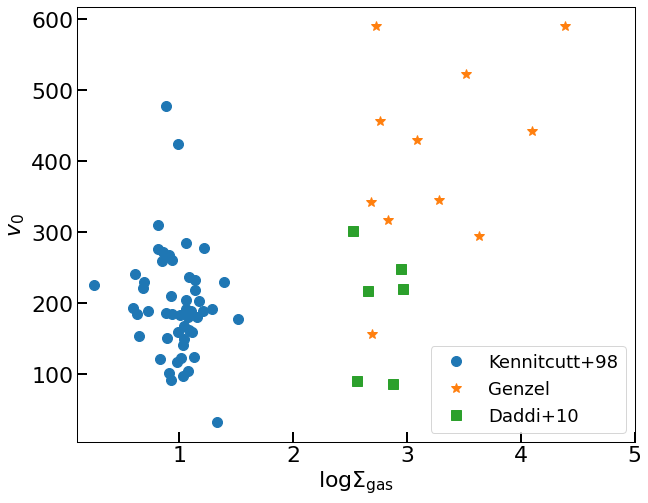

In [13]:
plt.figure(figsize=(10,8))
plt.plot(log_sigmagas_kenni[v0_kenni>0.0], v0_kenni[v0_kenni>0.0], 'o', label='Kennitcutt+98', markersize=10)
plt.plot(log_siggas_genzel, v0_genzel, '*', label = 'Genzel', markersize=10)
plt.plot(log_siggas_daddi, v0_daddi, 's', label='Daddi+10', markersize=10)
plt.ylabel(r"$v_0$")
plt.xlabel(r'log$\Sigma_{\rm gas}$')
plt.xlim(0.1, 5.)
plt.legend(fontsize=18,  loc='lower right')

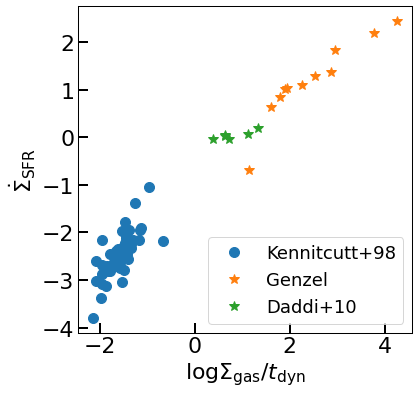

In [14]:
plt.figure(figsize=(6,6))
plt.plot(log_siggas_tdyn_kenni[v0_kenni>0.0], log_sigmaSFR_kenni[v0_kenni>0.0], 'o',\
         label='Kennitcutt+98', markersize=10)
plt.plot(log_siggas_tdyn_genzel, log_sigSFR_genzel, '*', label = 'Genzel', markersize=10)
plt.plot(log_siggas_tdyn_daddi, log_sigSFR_daddi, '*', label = 'Daddi+10', markersize=10)
plt.ylabel(r"$\dot{\Sigma}_{\rm SFR}$")
plt.xlabel(r'log$\Sigma_{\rm gas}/t_{\rm dyn}$')
# plt.xlim(0.1, 5.)
plt.legend(fontsize=18,  loc='lower right')

# Flux weighted fraction

In [15]:
Gamma = np.logspace(-3, np.log10(2.), 100)
xi_arr = np.logspace(-5, 3., 100) #xi = np.log(t0*G0/Sigma0)

a = rmax/r0

dMassFluxHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
       
        dMassFluxHI[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi, Mach, 0))[0]

        dMassFluxtot[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma,  Mach, 0))[0] 

        
    
        j+=1
            
    i+=1


In [16]:
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_flux = 1. - dMassFlux
FH2_flux[FH2_flux<0.0] = 0.0
np.amax(FH2_flux),np.amin(FH2_flux)

(0.9999704831858524, 0.0)

# Interpolator for Fraction

In [17]:
flux_fractionH2 = interpolate.interp2d(xi_arr, Gamma, np.transpose(FH2_flux), kind='cubic')

# Plot SFR vs SigGas/tdyn

In [10]:
flux_frac_kenni = np.zeros((xi_data_kenni.shape[0]))
for i in range(xi_data_kenni.shape[0]):
    flux_frac_kenni[i] = flux_fractionH2(xi_data_kenni[i], gamma_data_kenni[i])
    
flux_frac_daddi = np.zeros((xi_data_daddi.shape[0]))
for i in range(xi_data_daddi.shape[0]):
    flux_frac_daddi[i] = flux_fractionH2(xi_data_daddi[i], gamma_data_daddi[i])
    
flux_frac_genzel = np.zeros((xi_data_genzel.shape[0]))
for i in range(xi_data_genzel.shape[0]):
    flux_frac_genzel[i] = flux_fractionH2(xi_data_genzel[i], gamma_data_genzel[i])

NameError: name 'flux_fractionH2' is not defined

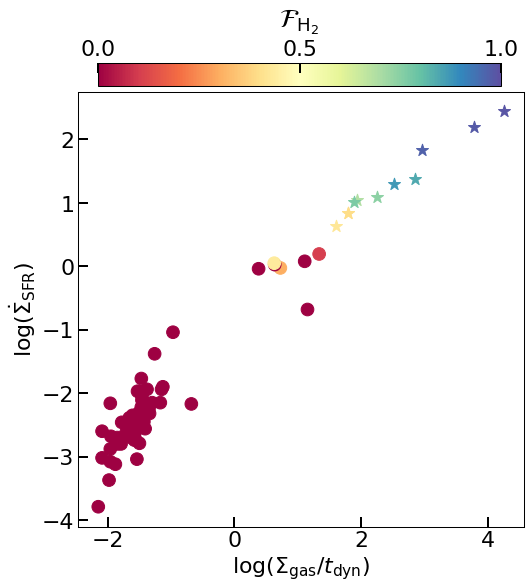

In [19]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 8))

cbarx = 0.16
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5
plane=0
cmap = 'Spectral'

mask = np.array(['Starburst' in s for s in gal_type])

plot = ax.scatter(log_siggas_tdyn_kenni, log_sigmaSFR_kenni, \
                            c=flux_frac_kenni ,\
                            marker='o', cmap=cmap, vmin=0.0, vmax=1.0, s=160)


plot = ax.scatter(log_siggas_tdyn_daddi, log_sigSFR_daddi, \
                            c=flux_frac_daddi ,\
                            marker='o', cmap=cmap, vmin=0.0, vmax=1.0, s=160)



for i in range(len(galtype_genzel)):
    if(galtype_genzel[i]=='Starburst'):
        if(i==1):
            plot = ax.scatter(log_siggas_tdyn_genzel[i],log_sigSFR_genzel[i],  \
                            c=flux_frac_genzel[i] ,\
                            marker='*', cmap=cmap, vmin=0.0, vmax=1.0, s=160, label='SB')
        plot = ax.scatter(log_siggas_tdyn_genzel[i], log_sigSFR_genzel[i], \
                            c=flux_frac_genzel[i] ,\
                            marker='*', cmap=cmap, vmin=0.0, vmax=1.0, s=160)

    else:
         plot = ax.scatter(log_siggas_tdyn_genzel[i], log_sigSFR_genzel[i], \
                            c=flux_frac_genzel[i] ,\
                            marker='o', cmap=cmap, vmin=0.0, vmax=1.0, s=160, label='Non-SB')





# plot = ax.scatter(log_siggas_tdyn_genzel, log_sigSFR_genzel, \
#                             c=flux_frac_genzel ,\
#                             marker='o', cmap=cmap, vmin=0.0, vmax=1.0, s=160)


cax  = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.5,  1.))
cax.xaxis.set_ticks_position('top')
ax.set_ylabel(r'log($\dot{\Sigma}_{\rm SFR}$)')
ax.set_xlabel(r'log($\Sigma_{\rm gas}/t_{\rm dyn}$)')
ax.text(0.45, 1.15, r"$\mathcal{F}_{\rm H_2}$", transform=ax.transAxes, fontsize=26)
save_fig = os.path.join(fig_path, 'sigSFR_sigGas.jpeg')
# plt.savefig(save_fig, bbox_inches='tight', dpi=160)

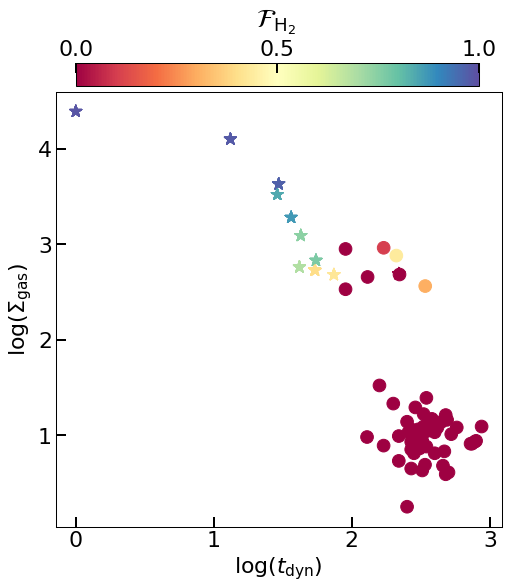

In [20]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.02, 'hspace':0.02},figsize=(8, 8))

cbarx = 0.16
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5
plane=0
cmap = 'Spectral'

mask = np.array(['Starburst' in s for s in gal_type])

plot = ax.scatter(np.log10(torb_kenni/Myr),log_sigmagas_kenni,  \
                            c=flux_frac_kenni ,\
                            marker='o', cmap=cmap, vmin=0.0, vmax=1.0, s=160)
# ax.set_ylim(-4., 3.)

for i in range(len(galtype_genzel)):
    if(galtype_genzel[i]=='Starburst'):
        if(i==1):
            plot = ax.scatter(np.log10(torb_genzel[i]/Myr),log_siggas_genzel[i],  \
                            c=flux_frac_genzel[i] ,\
                            marker='*', cmap=cmap, vmin=0.0, vmax=1.0, s=160, label='SB')
        plot = ax.scatter(np.log10(torb_genzel/Myr), log_siggas_genzel, \
                            c=flux_frac_genzel ,\
                            marker='*', cmap=cmap, vmin=0.0, vmax=1.0, s=160)

    else:
         plot = ax.scatter(np.log10(torb_genzel[i]/Myr), log_siggas_genzel[i], \
                            c=flux_frac_genzel[i] ,\
                            marker='o', cmap=cmap, vmin=0.0, vmax=1.0, s=160, label='Non-SB')



plot = ax.scatter(np.log10(torb_daddi/Myr), log_siggas_daddi, \
                            c=flux_frac_daddi ,\
                            marker='o', cmap=cmap, vmin=0.0, vmax=1.0, s=160)


cax  = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.5,  1.))
cax.xaxis.set_ticks_position('top')
ax.set_xlabel(r'log($t_{\rm dyn}$)')
ax.set_ylabel(r'log($\Sigma_{\rm gas}$)')
ax.text(0.45, 1.15, r"$\mathcal{F}_{\rm H_2}$", transform=ax.transAxes, fontsize=26)
save_fig = os.path.join(fig_path, 'siggas_vs_tdyn.jpeg')
# plt.savefig(save_fig, bbox_inches='tight', dpi=160)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


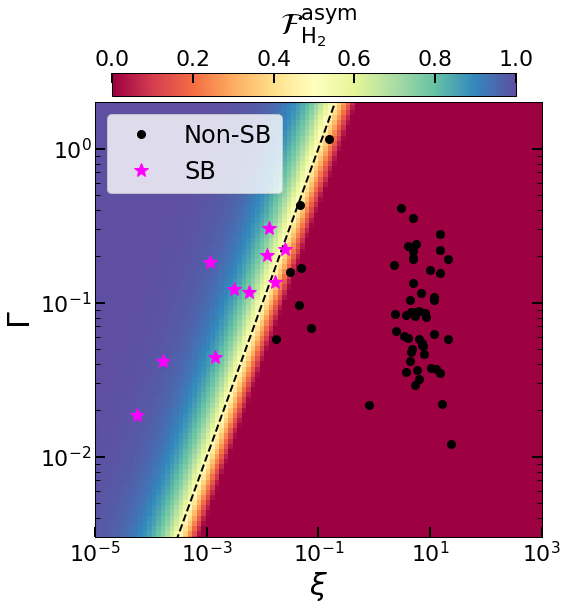

In [22]:
# plt.style.use('dark_background')
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.01, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("Spectral", 8, as_cmap=True)

plot = ax.pcolormesh(xi_arr, Gamma, np.transpose(FH2_flux),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}^{\mathrm{asym}}$", fontsize=30)
ax.set_xlim(1.e-5, 1.e3)
ax.set_ylim(3.e-3, 2.)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'$\Gamma$', fontsize=30)
ax.set_xlabel(r'$\xi$', fontsize=30)
ax.tick_params(axis='y', which='both', labelleft=True, right=True, left=True)



slope = 1.
yy =  (np.log10(xi_arr) * slope + 1.) 
ax.plot(xi_arr, 10.**yy, color='black', ls='--', lw=2.)
ax.legend(loc='lower right', fontsize="30")


ax.plot(xi_data_kenni, gamma_data_kenni, 'o', color='black', markersize=8)
ax.plot(xi_data_daddi, gamma_data_daddi, 'o', color='black', markersize=8)
for i in range(len(galtype_genzel)):
    if(galtype_genzel[i]=='Starburst'):
        if(i==1):
            ax.plot(xi_data_genzel[i], gamma_data_genzel[i], '*', color='magenta', markersize=14, label='SB')
        else:
            ax.plot(xi_data_genzel[i], gamma_data_genzel[i], '*', color='magenta', markersize=14)
    else:
        ax.plot(xi_data_genzel[i], gamma_data_genzel[i], 'o', color='black', markersize=8, label='Non-SB')


ax.legend(loc='upper left', fontsize="24")
file_name = os.path.join(fig_path, 'gamma_xi_gals_.jpeg')
plt.savefig(file_name, bbox_inches='tight', dpi=160 )


# Flux weighted fraction for Intermediate

In [26]:
Gamma = np.logspace(-3, np.log10(2.), 100)
xi_arr = np.logspace(-5, 3., 100) #xi = np.log(t0*G0/Sigma0)

a = rmax/r0

dMassFluxHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
       
        dMassFluxHI [i,j] = integrate.dblquad(dMassFlux_HI, 1, a, xlow, xhigh,   \
                                            args=(gamma, xi, Mach, 1))[0]
        dMassFluxtot[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,   \
                                            args=(a, gamma,  Mach, 1))[0]
        
    
        j+=1
            
    i+=1

    


KeyboardInterrupt: 

In [ ]:
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_fluxInt = 1. - dMassFlux
FH2_fluxInt[FH2_fluxInt<0.0] = 0.0
np.amax(FH2_fluxInt),np.amin(FH2_fluxInt)

# Flux weighted fraction for Const Solid Angle

In [22]:
Gamma = np.logspace(-3, np.log10(2.), 100)
xi_arr = np.logspace(-5, 3., 100) #xi = np.log(t0*G0/Sigma0)

a = rmax/r0

dMassFluxHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        if(xcrit<0.0):
            xhigh = 1.01*xcrit
        else:
            xhigh = 0.99*xcrit
       
        dMassFluxHI[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, xi, Mach, 2))[0]

        dMassFluxtot[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma,  Mach, 2))[0] 

        
    
        j+=1
            
    i+=1
    
dMassFlux = dMassFluxHI/dMassFluxtot
FH2_fluxSA = 1. - dMassFlux
FH2_fluxSA[FH2_fluxSA<0.0] = 0.0
np.amax(FH2_fluxSA),np.amin(FH2_fluxSA)

(0.9999982069738076, 0.0)

In [ ]:
import h5py
file_intfhi = 'FHI_Int.h5'
flux_int = h5py.File(file_intfhi, 'r')

FH2_fluxInt= flux_int['FHI_Int']
gamma = flux_int['Gamma_yaxis']
xi = flux_int['xi_arr_xaxis']


file_SAfhi = 'FHI_SA.h5'
flux_SA = h5py.File(file_SAfhi, 'r')
# flux_SA.keys()
FH2_fluxSA= flux_SA['FHI_SA']
gamma = flux_SA['Gamma']
xi = flux_SA['xi_arr']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


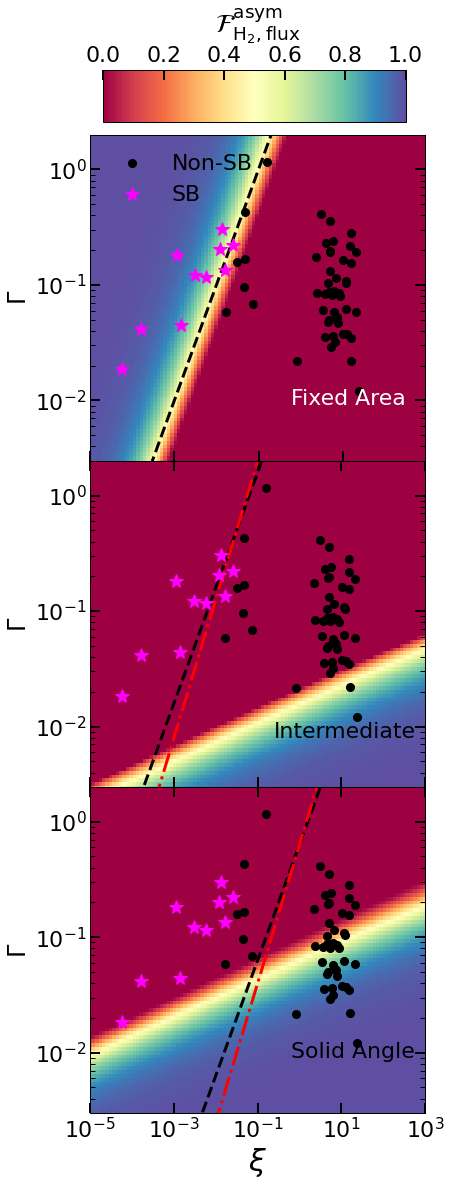

In [31]:
fig, ax = plt.subplots(3, 1, gridspec_kw = {'wspace':0.0, 'hspace':0.00},figsize=(6,18))

cbarx    = 0.155
cbheight = 0.04
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
lightness = 0.5
sns.desaturate("yellow",0.5)
colors =  sns.color_palette("Spectral", 8, as_cmap=True)



plot = ax[0].pcolormesh(xi_arr, Gamma, np.transpose(FH2_flux),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}$", fontsize=30)
ax[0].set_xlim(1.e-5, 9.e2)
ax[0].set_ylim(3.e-3, 2.)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel(r'$\Gamma$', fontsize=24)
ax[0].tick_params(axis='y', which='both', labelleft=True, right=True, left=True)
ax[0].tick_params(axis='x', which='both', labelbottom=False, bottom=True)



slope = 1.
yy =  (np.log10(xi_arr) * slope + 1.) 
ax[0].plot(xi_arr, 10.**yy, color='black', ls='--', lw=3.)
ax[0].legend(loc='lower right', fontsize="30")


plot = ax[1].pcolormesh(xi_arr, Gamma, np.transpose(FH2_fluxInt),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax.set_title(r" $\mathcal{F}_{\rm H_2, flux}^{\rm asym}$")
ax[1].set_xlim(1.e-5, 1.e3)
ax[1].set_ylim(3.e-3, 2.)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_ylabel(r'$\Gamma$', fontsize=24)
ax[1].set_xlabel(r'$\xi$', fontsize=24)
ax[1].tick_params(axis='y', which='both', labelleft=True, right=True, left=True)
ax[1].tick_params(axis='x', which='both', labelbottom=False, bottom=True, top=True)



plot = ax[2].pcolormesh(xi_arr, Gamma, np.transpose(FH2_fluxSA),\
                    vmin=0., vmax=1.,
                    cmap=colors)
ax[2].set_xlim(1.e-5, 1.e3)
ax[2].set_ylim(3.e-3, 2.)
ax[2].set_yscale('log')
ax[2].set_xscale('log')
ax[2].yaxis.tick_right()
ax[2].set_ylabel(r'$\Gamma$', fontsize=24)
# ax[2].yaxis.set_label_position("right")
ax[2].set_xlabel(r'$\xi$', fontsize=30)
ax[2].tick_params(axis='y', which='both', labelleft=True, right=True, left=True, labelright=False)
ax[2].tick_params(axis='x', which='both', top=True, bottom=True)

slope = 1.
yy =  (np.log10(xi_arr) * slope + 1.2) 
ax[1].plot(xi_arr, 10.**yy, color='black', ls='--', lw=3.)



slope = 1.
yy =  (np.log10(xi_arr) * slope -0.2) 
ax[2].plot(xi_arr, 10.**yy, color='black', ls='--', lw=3.)



##Add curves for isothermal potential-- from isothermal_mass_distribution.ipynb#####
slope = 1.2
yy =  (np.log10(xi_arr) * slope +1.5) 
ax[1].plot(xi_arr, 10.**yy, color='red', ls='-.', lw=3.)


slope = 1.2
yy =  ( np.log10(xi_arr) * slope -0.2) 
ax[2].plot(xi_arr, 10.**yy, color='red', ls='-.', lw=3.)


##########################

for i in range(3):
    ax[i].plot(xi_data_kenni, gamma_data_kenni, 'o', color='black', markersize=8)
    ax[i].plot(xi_data_daddi, gamma_data_daddi, 'o', color='black', markersize=8)

    for j in range(len(galtype_genzel)):
        if(galtype_genzel[j]=='Starburst'):
            if(j==1 and i==0):
                ax[i].plot(xi_data_genzel[j], gamma_data_genzel[j], '*', color='magenta', markersize=14, label='SB')
            else:
                ax[i].plot(xi_data_genzel[j], gamma_data_genzel[j], '*', color='magenta', markersize=14)
        else:
            ax[i].plot(xi_data_genzel[j], gamma_data_genzel[j], 'o', color='black', markersize=8, label='Non-SB')



ax[0].legend(loc='upper left', fontsize="22", frameon=False)
# ax[1].legend(loc='upper left', fontsize="24", frameon=False)

ax[0].text(0.6, 0.17,'Fixed Area', transform=ax[0].transAxes, color='white', fontsize=22)
ax[1].text(0.55, 0.15,'Intermediate', transform=ax[1].transAxes, color='black', fontsize=22)
ax[2].text(0.6, 0.17,'Solid Angle', transform=ax[2].transAxes, color='black', fontsize=22)



# ax[1].legend(loc='upper left', fontsize="26")
file_name = os.path.join(fig_path, 'gamma_xi_gals_fAr_SA_int.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )


In [42]:
# file_SAfhi = 'FHI_SA.h5'
# xi_arr
# hf = h5py.File(file_SAfhi, 'w')
# hf.create_dataset('FHI_SA', data=np.transpose(FH2_fluxSA))
# hf.create_dataset('Gamma_yaxis', data= Gamma)
# hf.create_dataset('xi_arr_xaxis', data= xi_arr)
# hf.close()

In [43]:
# file_SAfhi = 'FHI_Int.h5'
# xi_arr
# hf = h5py.File(file_SAfhi, 'w')
# hf.create_dataset('FHI_Int', data=np.transpose(FH2_fluxInt))
# hf.create_dataset('Gamma_yaxis', data= Gamma)
# hf.create_dataset('xi_arr_xaxis', data= xi_arr)
# hf.close()